**Demographics and War**

Authored by: Jonathan Broch jb5365.

    War has been around since the dawn of time. As long as humans have been around they have bee fighting eachother over resources and even ideas. My project strives to take the first step in answering if there are demographic enablers for war. Traditionally, in order to fight civil wars, populations need a pool of young to be used as fighters. No youth, no war? The other parameter that must be satisfied in order for armed conflict to occur is that young people have to choose violence over the alternative. If all the youth are already employed in careers of their choice, why would they fight? My project strives to look for patterns in the population growth and youth unemployment data to see if countries that are currently experiencing civil war can be grouped together by this data.
    
    I got population data from the UN website and datbase. I averaged the population growth rates from 1985 - 2005 because people born in those years would be considered "youth", between 15 and 25 years old by 2010. 2010 is the year I chose because it is the year before civil war broke out in Syria and other armed conflicts in the middle east.
    
    I used the youth unemployment data from the World Bank. I only used youth unemployment data for 2010 because that is the year relevent to my analysis and the average population growth rate calculated with the UN data.

In [3]:
# import packages 
import pandas as pd                   # data management
import matplotlib.pyplot as plt       # graphics
import urllib
import numpy as np

# IPython command, puts plots in notebook 
%matplotlib inline

# check Python version 
import datetime as dt 
import sys
print('Today is', dt.date.today())
print('What version of Python are we running? \n', sys.version, sep='')

Today is 2016-05-09
What version of Python are we running? 
3.5.1 |Anaconda 2.4.1 (64-bit)| (default, Feb 16 2016, 09:49:46) [MSC v.1900 64 bit (AMD64)]


In [4]:
#I am downloading and saving the UN data on population growth by year

import requests

url1 = "http://esa.un.org/unpd/wpp/DVD/Files/"
url2 = "1_Indicators%20(Standard)/EXCEL_FILES/"
url3 = "1_Population/WPP2015_POP_F02_POPULATION_GROWTH_RATE.XLS"
UNdata = url1 + url2 + url3

resp = requests.get(UNdata)
with open('UNdata.xls', 'wb') as output:
    output.write(resp.content)

In [5]:
#I am downloading and saving the World Bank data on youth unemployment

url4 = "http://api.worldbank.org/v2/en/indicator/sl.uem.1524.zs?downloadformat=excel"
url5 = ''
url6 = ''
WBdata = url4 + url5 + url6

resp = requests.get(WBdata)
with open('WBdata.xls', 'wb') as output:
    output.write(resp.content)

**DATA**

After downloading both files, I created a consolidated sheet on excel. This was difficult because the UN and World Banks did not use the same names for the same country. For example, "PDR Korea" in the UN file was classified as "the people's republic of Korea" in the World Bank. There were around 25 instances of this occuring. Next, I used formulas in excel to extract data from the UN and WB files to populate a table that had 

"Country name" in the first column, 

"Country code" in the second, 

"Population Growth" in the third, 

"Youth Unemployment" in the 4th column, and 

"Group" in the fifth. The group designation will be explained later.

In [6]:
#after combining both files, I uploaded the excel document to my dropbox at the link below

xls_file = pd.ExcelFile('https://dl.dropboxusercontent.com/u/16846867/UN-WB%202010%20PG%20vs%20YU.xlsx')
xls_file

In [7]:
#Here is the data I will analyze. Population growth is an average from 1985-2005 and youth unemployment data is from 2010.

Dataurl = 'https://dl.dropboxusercontent.com/u/16846867/UN-WB%202010%20PG%20vs%20YU.xlsx'

FP1 = pd.read_excel(Dataurl, sheetname=1, skiprows=0, na_values=['…'])

Data = FP1[list(range(5))]

Data

,Country Name,Country Code,Population Growth,Youth Unemployment,Group
0,Georgia,GEO,-0.83400,36.799999,C
1,Bulgaria,BGR,-0.76925,22.900000,C
2,Curacao,CUW,-0.75100,NaN,A
3,Latvia,LVA,-0.73825,34.900002,C
4,Bosnia and Herzegovina,BIH,-0.65450,57.200001,C
5,Estonia,EST,-0.58000,33.299999,C
6,Armenia,ARM,-0.51075,38.299999,C
7,Ukraine,UKR,-0.42250,17.400000,C
8,Romania,ROU,-0.38125,22.299999,C
9,Croatia,HRV,-0.37200,33.500000,C


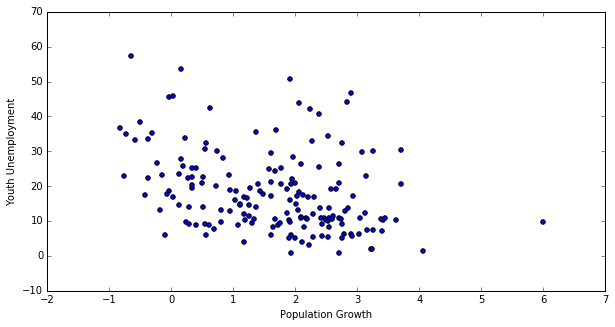

In [8]:
#here is all the data in a scatter plot
Data.plot.scatter(x="Population Growth", y="Youth Unemployment", figsize=(10, 5), alpha=1)

In [149]:
#Here are the values I am using the split the data into 4 groups

Data.median(axis=None, skipna=True, level=None, numeric_only=None)

Population Growth      1.770625
Youth Unemployment    16.326897
dtype: float64

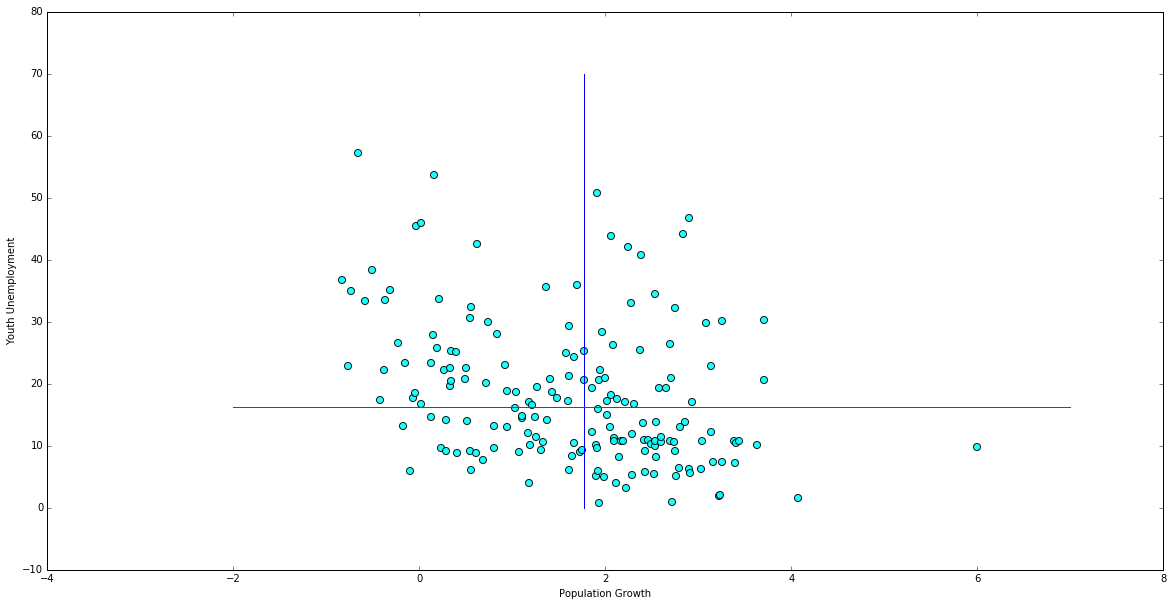

In [150]:
#Here is the same scatter plot with lines dividing the data into groups.

#Group A: Low pop growth, Low youth unemployment.  Lower left
#Group B: High pop growth, Low youth unemployment. Lower right
#Group C: Low pop growth, High youth unemployment. Upper left
#Group D: High pop growth, High youth unemployment Upper right

Data.plot.scatter(x="Population Growth", y="Youth Unemployment", figsize=(20, 10), alpha=.9, s=50, color ="cyan")

#I used the numbers for median pop growth and youth unemployment to divide the data into 4 groups.
#Below is the code i used to intput the dividing lines

PM1 = [1.770625, 1.770625]
PM2 = [0,70]
plt.plot(PM1, PM2)

YE1 = [-2, 7]
YE2 = [16.326897,16.326897]
plt.plot(YE1, YE2)
plt.show()

In [97]:
#I am most interested by countries with high population growth and high youth unemployment, Group D.
#My prediction is that countries in this group are more likely to be countries currently undergoing or about to undergo civil unrest.
#As you can see, some of the most obvious countries currently undergoing violent unrest are in the top 12 of Group D.

Data[(Data.Group == "D")].sort_values("Population Growth", axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(12)

,Country Name,Country Code,Population Growth,Youth Unemployment,Group
200,Afghanistan,AFG,3.70475,20.600000,D
199,"Yemen, Rep.",YEM,3.70450,30.299999,D
192,Jordan,JOR,3.25225,30.100000,D
188,Sudan,SDN,3.13250,22.799999,D
186,Saudi Arabia,SAU,3.08125,29.799999,D
181,Kenya,KEN,2.93325,17.100000,D
179,Mauritania,MRT,2.89750,46.700001,D
176,Namibia,NAM,2.83675,44.099998,D
172,Iraq,IRQ,2.75350,32.299999,D
168,Belize,BLZ,2.70500,20.900000,D


In [98]:
#This table shows countries in group A, sorted by lowest youth unemployment. 
#Most of these countries are traditionally known as being extremely stable in 2010.

Data[(Data.Group == "A")].sort_values("Youth Unemployment", axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last').head(12)

,Country Name,Country Code,Population Growth,Youth Unemployment,Group
73,Thailand,THA,1.17775,4.0,A
15,Kazakhstan,KAZ,-0.10525,6.0,A
46,Cuba,CUB,0.55250,6.1,A
93,Vietnam,VNM,1.60775,6.1,A
52,Switzerland,CHE,0.68850,7.7,A
96,Bhutan,BTN,1.64075,8.4,A
39,Austria,AUT,0.40075,8.8,A
50,Netherlands,NLD,0.60475,8.8,A
100,Peru,PER,1.72750,9.0,A
66,China,CHN,1.07675,9.0,A


In [99]:
#This table shows countries with the lowest Youth Unemployment. At a glance, they seem to be countries that have
#undergone violent civil strife in the past 50 years. Rwanda, Cambodia, Liberia, Sierra Leone

Data.sort_values("Youth Unemployment", axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last').head(10)

,Country Name,Country Code,Population Growth,Youth Unemployment,Group
116,Rwanda,RWA,1.93425,0.7,B
169,Cambodia,KHM,2.71225,0.9,B
202,Qatar,QAT,4.06675,1.5,B
190,Guinea,GIN,3.21925,1.9,B
191,Benin,BEN,3.23175,2.0,B
139,Lao PDR,LAO,2.22675,3.2,B
73,Thailand,THA,1.17775,4.0,A
133,Nepal,NPL,2.11350,4.0,B
122,Liberia,LBR,1.98700,5.0,B
110,Sierra Leone,SLE,1.90300,5.1,B


In [9]:
#This table shows countries with the lowest populaiton growth. Coincidentally, there are many countries in eastern Europe.

Data.sort_values("Population Growth", axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last').head(12)

,Country Name,Country Code,Population Growth,Youth Unemployment,Group
0,Georgia,GEO,-0.83400,36.799999,C
1,Bulgaria,BGR,-0.76925,22.900000,C
2,Curacao,CUW,-0.75100,NaN,A
3,Latvia,LVA,-0.73825,34.900002,C
4,Bosnia and Herzegovina,BIH,-0.65450,57.200001,C
5,Estonia,EST,-0.58000,33.299999,C
6,Armenia,ARM,-0.51075,38.299999,C
7,Ukraine,UKR,-0.42250,17.400000,C
8,Romania,ROU,-0.38125,22.299999,C
9,Croatia,HRV,-0.37200,33.500000,C


In [10]:
#This table shows countries that have the highest population growth rates.

Data.sort_values("Population Growth", axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(12)

,Country Name,Country Code,Population Growth,Youth Unemployment,Group
205,United Arab Emirates,ARE,5.99825,9.800000,B
204,Turks and Caicos Islands,TCA,5.11875,NaN,B
203,Cayman Islands,CYM,4.61600,NaN,B
202,Qatar,QAT,4.06675,1.500000,B
201,Northern Mariana Islands,MNP,3.76075,NaN,B
200,Afghanistan,AFG,3.70475,20.600000,D
199,"Yemen, Rep.",YEM,3.70450,30.299999,D
198,Bahrain,BHR,3.63100,10.200000,B
197,Equatorial Guinea,GNQ,3.44225,10.800000,B
196,Chad,TCD,3.40775,10.400000,B


**The Grand Finale**

And now back to what I thought was interesting. Here is the scatter plot with countries that have had thousands of death in the past years due to armed conflict as well as some of the largest economies in the world **highlighted**

in **RED** Afghanistan, Iraq, Yemen, Sudan, Syria, and Libya

in **BLUE** The United States

in **YELLOW** China

in **GREEN** India

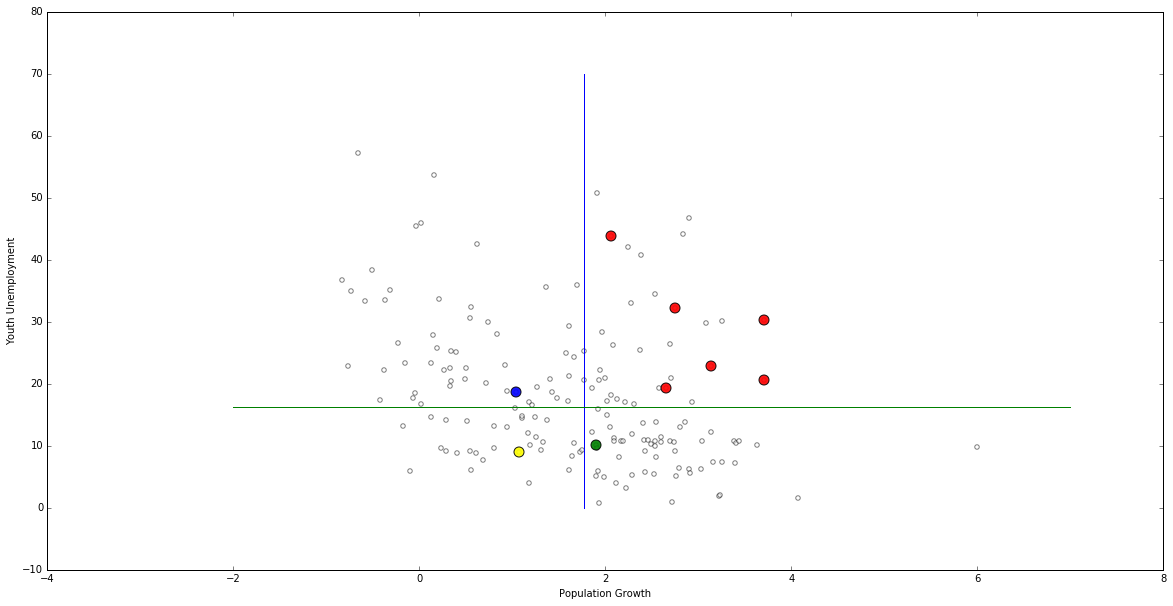

In [140]:
fig, ax = plt.subplots()
Data.plot.scatter(ax=ax, x="Population Growth", y="Youth Unemployment", figsize=(20,10), alpha=.5, color = 'white')
Data.iloc[199:201].plot.scatter(ax=ax, x="Population Growth", y="Youth Unemployment", figsize=(20,10), alpha=.9, color = 'red', s=100)
Data.iloc[172:173].plot.scatter(ax=ax, x="Population Growth", y="Youth Unemployment", figsize=(20,10), alpha=.9, color = 'red', s=100)
Data.iloc[164:165].plot.scatter(ax=ax, x="Population Growth", y="Youth Unemployment", figsize=(20,10), alpha=.9, color = 'red', s=100)
Data.iloc[188:189].plot.scatter(ax=ax, x="Population Growth", y="Youth Unemployment", figsize=(20,10), alpha=.9, color = 'red', s=100)
Data.iloc[129:130].plot.scatter(ax=ax, x="Population Growth", y="Youth Unemployment", figsize=(20,10), alpha=.9, color = 'red', s=100)
Data.iloc[64:65].plot.scatter(ax=ax, x="Population Growth", y="Youth Unemployment", figsize=(20,10), alpha=.9, color = 'blue', s=100)
Data.iloc[66:67].plot.scatter(ax=ax, x="Population Growth", y="Youth Unemployment", figsize=(20,10), alpha=.9, color = 'Yellow', s=100)
Data.iloc[109:110].plot.scatter(ax=ax, x="Population Growth", y="Youth Unemployment", figsize=(20,10), alpha=.9, color = 'green', s=100)

PM1 = [1.770625, 1.770625]
PM2 = [0,70]
plt.plot(PM1, PM2)

YE1 = [-2, 7]
YE2 = [16.326897,16.326897]
plt.plot(YE1, YE2)